In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn import ensemble
%matplotlib inline
from sklearn.cross_validation import train_test_split
import sklearn.metrics as sk
from scipy.stats import norm

In [3]:
df = pd.read_csv('autos6 copy.csv',sep=',', header=0, encoding='cp1252')
df = df.drop(['Unnamed: 0','dateCreated','registration_month'],axis=1)
df.head(10)



   price   abtest vehicleType  registration_year    gearbox  powerPS  \
0   1500     test  kleinwagen               2001    manuell       75   
1   3600     test  kleinwagen               2008    manuell       69   
2    650     test   limousine               1995    manuell      102   
3   2200     test      cabrio               2004    manuell      109   
4   2000  control   limousine               2004    manuell      105   
5   2799  control       kombi               2005    manuell      140   
6  17999  control         suv               2011    manuell      190   
7   1750  control  kleinwagen               2004  automatik       75   
8   7550     test         bus               2007    manuell      136   
9   1850     test         bus               2004    manuell      102   

      model  kilometer fuelType          brand  notRepairedDamage  
0      golf     150000   benzin     volkswagen                  0  
1     fabia      90000   diesel          skoda                  0  
2  

# Visualization

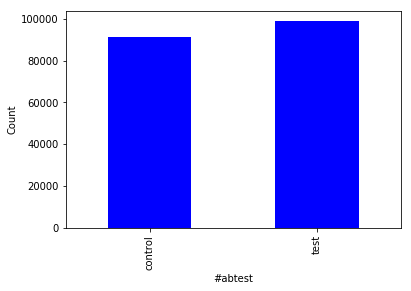

In [170]:
# plt.hist('abtest')

len(df['abtest'].unique())
df['abtest'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('#abtest')
plt.ylabel('Count')



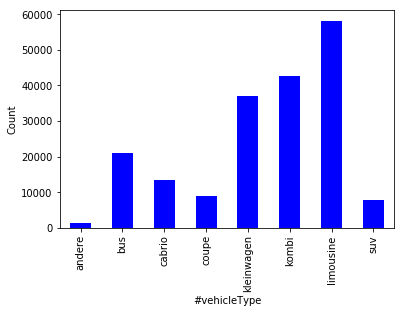

In [171]:
# plt.hist('vehicleType')

len(df['vehicleType'].unique())
df['vehicleType'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('#vehicleType')
plt.ylabel('Count')

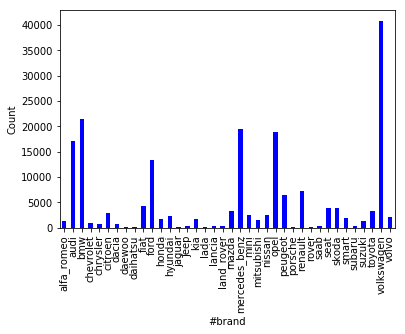

In [172]:
# plt.hist('brand')

len(df['brand'].unique())
df['brand'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('#brand')
plt.ylabel('Count')

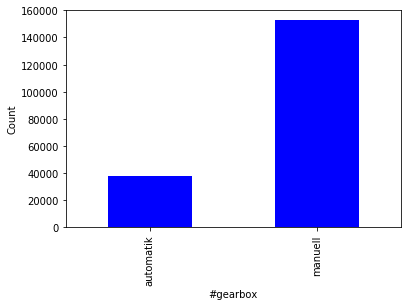

In [173]:
len(df['gearbox'].unique())
df['gearbox'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('#gearbox')
plt.ylabel('Count')

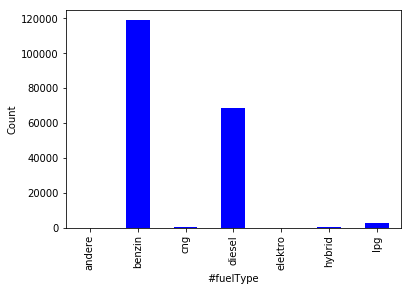

In [174]:
len(df['fuelType'].unique())
df['fuelType'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('#fuelType')
plt.ylabel('Count')

      price  registration_year  powerPS  kilometer  notRepairedDamage
0.05    840               1995       64      40000                  0
0.85  10599               2010      170     150000                  0


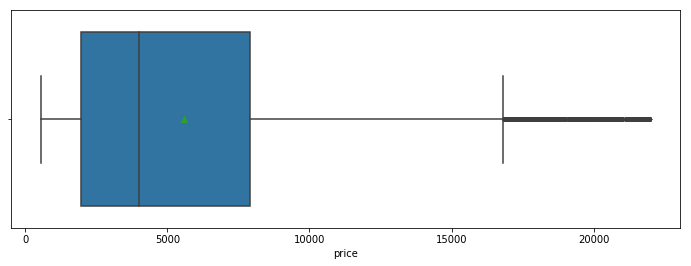

In [175]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x ='price', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
print df.quantile([.05,.85] )
plt.show()

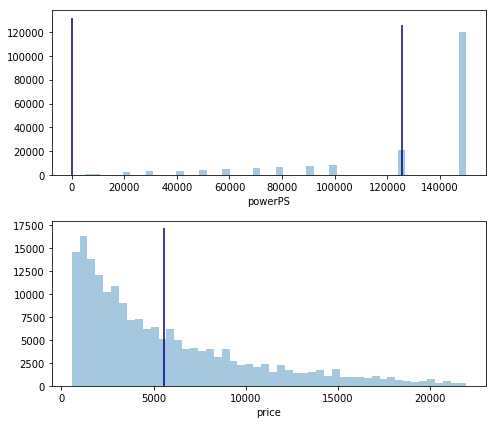

In [184]:
fig, ax = plt.subplots(2, 1, figsize=(7,6))

sns.distplot(df['kilometer'], kde=False, ax=ax[0])
axmin, axmax = ax[0].get_ylim()
ax[0].vlines(df['kilometer'].mean(), axmin, axmax, colors='navy', linestyles='-', label='mean value')


sns.distplot(df['powerPS'], kde=False, ax=ax[0])
axmin, axmax = ax[0].get_ylim()
ax[0].vlines(df['powerPS'].mean(), axmin, axmax, colors='navy', linestyles='-', label='mean value')


sns.distplot(df['price'], kde=False, ax=ax[1])
axmin, axmax = ax[1].get_ylim()
ax[1].vlines(df['price'].mean(), axmin, axmax, colors='navy', linestyles='-', label='mean value')


plt.tight_layout()
plt.show()

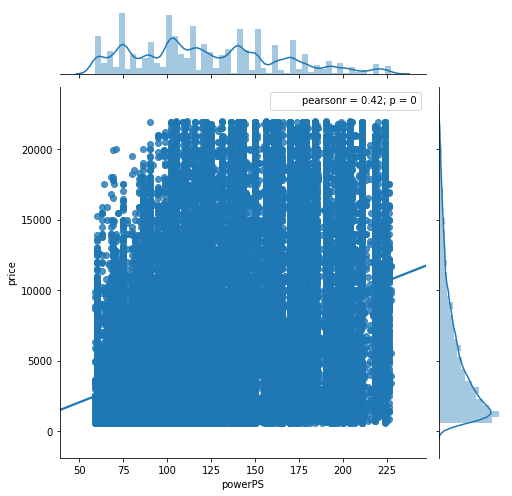

In [4]:
sns.jointplot(x="powerPS", y="price", data=df, kind = 'reg', size = 7)
plt.show()

# Check the correlation

Actually there are only tree real numerical variables "registration_year", "powerPS" and "kilometer". The catecorical variables are can not appear in the matrix

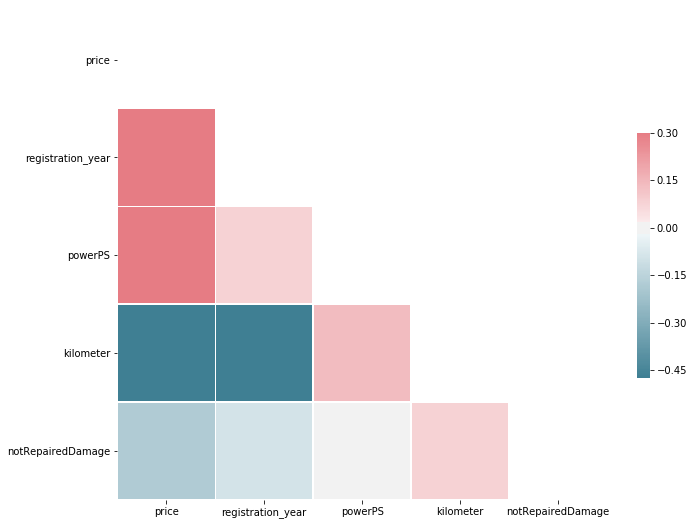

In [5]:
corr=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Turn categorical variables into indicators


We think that the Label Encodeing has some serieus downside, becasuse the numeric values can be “misinterpreted” by the algorithms. 
So instead, i use One hot encoding, turning the categorical variables into dummy variables. However "model" is applied to Lavel Encoding as there are more then 150 different labels.

In [6]:
# Apply Label Encoding to 'model'
df['model']=df['model'].astype('category')
df['model_cat'] = df['model'].cat.codes
df.head()


   price   abtest vehicleType  registration_year  gearbox  powerPS    model  \
0   1500     test  kleinwagen               2001  manuell       75     golf   
1   3600     test  kleinwagen               2008  manuell       69    fabia   
2    650     test   limousine               1995  manuell      102      3er   
3   2200     test      cabrio               2004  manuell      109  2_reihe   
4   2000  control   limousine               2004  manuell      105  3_reihe   

   kilometer fuelType       brand  notRepairedDamage  model_cat  
0     150000   benzin  volkswagen                  0        115  
1      90000   diesel       skoda                  0        100  
2     150000   benzin         bmw                  1         11  
3     150000   benzin     peugeot                  0          8  
4     150000   benzin       mazda                  0         10  

In [7]:
# turn "vehicleType" and "brand" and all the other categorical variables into dummy 
df=pd.get_dummies(df, columns=["abtest", "vehicleType","gearbox","fuelType","brand"])


Recheck the correlation matrix

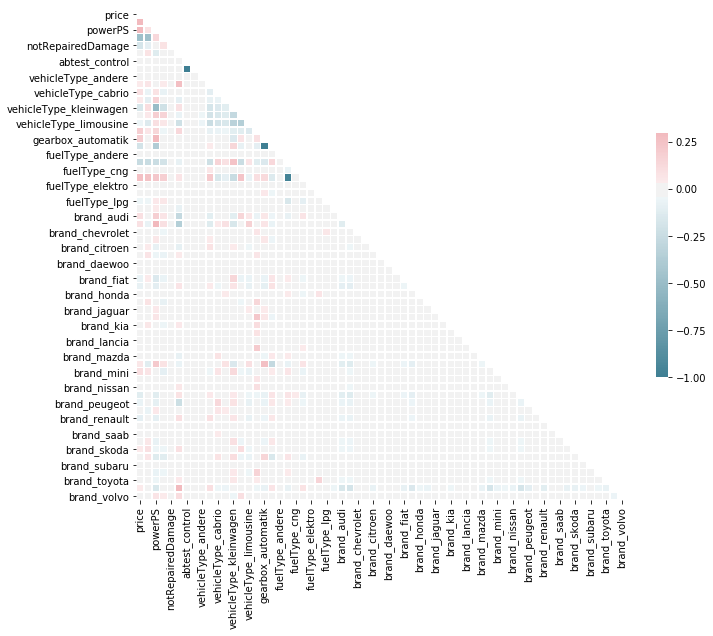

In [8]:
corr=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model Training 
# Linear regression

In [9]:
#Define initial model without price

df0=df.drop(['model'],axis=1)
df0 = df0.iloc[:,1:]
df0= np.matrix(df0)
Y0=df.price

x_train0, x_test0, y_train0, y_test0 = train_test_split (df0, Y0, test_size = 0.2, random_state = 2)

In [14]:
clf_original = linear_model.LinearRegression()
clf_original.fit(x_train0, y_train0)
r_squared=clf_original.score(x_test0, y_test0)
print r_squared
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test0)-1)/(len(y_test0)-x_test0.shape[1]-1)
print adjusted_r_squared

y0_pred = clf_original.predict(x_test0)
a =sk.mean_squared_error(y_test0, y0_pred)
RSE = a**(1.0/2.0)
RSE

y_clf_original_pred = clf_original.predict(x_test0)
a_clf_original =sk.mean_squared_error(y_test0, y_clf_original_pred) 
RSE_clf_original = a_clf_original**(1.0/2.0)
NRMSD_clf_original = RSE_clf_original/ np.mean(y_test0)

print RSE_clf_original
print NRMSD_clf_original

0.709628028156
0.709154612192
2562.17690826
0.456472438329


In [12]:
# Using K-fold to check the RMSE
from sklearn.cross_validation import cross_val_score
scores_linear_reg = cross_val_score(clf_original, df0, df.price, cv=10, scoring = 'mean_squared_error')
scores_linear_reg


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


/Users/kangsnoopy/Library/Python/2.7/lib/python/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


array([-6509340.96512664, -6372817.38092954, -6571687.7204507 ,
       -6701930.22933477, -6596013.72557494, -6480717.02070546,
       -6630367.28846514, -6569830.82454227, -6370385.16755635,
       -6455263.64125837])

# Ensemble Gradient Boosting

In [9]:
ens_grad = ensemble.GradientBoostingRegressor\
    (n_estimators = 700, max_depth = 10, min_samples_split = 4, learning_rate = 0.1)
ens_grad.fit(x_train0, y_train0) 
score_EDB = ens_grad.score(x_test0, y_test0)

In [10]:
r_squared=score_EDB
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test0)-1)/(len(y_test0)-x_test0.shape[1]-1)
print adjusted_r_squared

0.820478424695


In [11]:
#RMSE for Ensemble Gradient boosting
y_ens_grad_pred = ens_grad.predict(x_test0)
a_ens_grad =sk.mean_squared_error(y_test0, y_ens_grad_pred) 
RSE_ens_grad = a_ens_grad**(1.0/2.0)
NRMSD_EGD = RSE_ens_grad/ np.mean(y_test0)

print RSE_ens_grad
print NRMSD_EGD

2012.99204002
0.358630733843


# Random forest 1 with make_regression

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

x_train0, y_train0 = make_regression(n_samples=500, n_features=100, n_informative=10,random_state=0, shuffle=False)
regrf = RandomForestRegressor(max_depth=30, random_state=0)
regrf.fit(x_test0, y_test0)
score_RF1=regrf.score(x_test0, y_test0)


print score_RF1


0.964855104985


In [143]:
y_rf_pred = regrf.predict(x_test0)
a_rf =sk.mean_squared_error(y_test0, y_rf_pred) 
RSE_rf = a_rf**(1.0/2.0)
NRMSD_RF = RSE_rf/ np.mean(y_test0)

print RSE_rf
print NRMSD_RF

891.380011302
0.158806523439


# Random forest 2 with GridSearchCV

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [40]
              , "n_estimators": [100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(x_train0, y_train0)


score_m_RF2=gs.best_score_
print(score_m_RF2)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   43.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   43.2s finished


0.884507992812
{'min_samples_split': 3, 'n_estimators': 100, 'criterion': 'mse', 'max_depth': 40, 'min_samples_leaf': 3}


In [165]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(x_train0, y_train0)
# Explained variance score: 1 is perfect prediction

score_RF2=forest.score(x_test0, y_test0)
print ('score_RF',score_RF2)

('score_RF', 0.900384566782229)


In [166]:
y_rf2_pred = forest.predict(x_test0)
a_rf2 =sk.mean_squared_error(y_test0, y_rf2_pred) 
RSE_rf2 = a_rf2**(1.0/2.0)
NRMSD_RF2 = RSE_rf2/ np.mean(y_test0)

print RSE_rf2
print NRMSD_RF2

1500.70413743
0.267362520759


We try to reduce the number of variables to simplify the model;
To do this we have to find the most important features:

In [192]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(df0.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 0 (0.625606)
2. feature 1 (0.209275)
3. feature 2 (0.032816)
4. feature 4 (0.031407)
5. feature 9 (0.011997)
6. feature 3 (0.010384)
7. feature 60 (0.009369)
8. feature 25 (0.007130)
9. feature 44 (0.007000)
10. feature 20 (0.004826)
11. feature 14 (0.004658)
12. feature 26 (0.004292)
13. feature 12 (0.003354)
14. feature 48 (0.002937)
15. feature 45 (0.002926)
16. feature 13 (0.002920)
17. feature 15 (0.002655)
18. feature 16 (0.002555)
19. feature 8 (0.002456)
20. feature 6 (0.002454)
21. feature 5 (0.002444)
22. feature 18 (0.002100)
23. feature 10 (0.001855)
24. feature 11 (0.001312)
25. feature 34 (0.001043)
26. feature 51 (0.001034)
27. feature 42 (0.000890)
28. feature 49 (0.000837)
29. feature 59 (0.000784)
30. feature 54 (0.000607)
31. feature 27 (0.000580)
32. feature 55 (0.000474)
33. feature 36 (0.000440)
34. feature 43 (0.000433)
35. feature 38 (0.000369)
36. feature 47 (0.000361)
37. feature 24 (0.000346)
38. feature 33 (0.000325)
39. feature 3

In [193]:
# We can see that the scores for many features are extremly low, so we just keep the fist 15 variables 
df1 =pd.DataFrame(df0)
df1 = df1.loc[:, [0,1,2,3,4,9,3,60,25,44,20,14,26,12,48]]

df1= np.matrix(df1)
Y1=df.price

x_train1, x_test1, y_train1, y_test1 = train_test_split (df1, Y1, test_size = 0.2, random_state = 2)

Run Random Forest model : results are less good than model using all features

In [197]:
x_train1, y_train1 = make_regression(n_samples=100, n_features=10, n_informative=10,random_state=0, shuffle=False)
regrf = RandomForestRegressor(max_depth=30, random_state=0)
regrf.fit(x_test1, y_test1)
score_RF1_s=regrf.score(x_test1, y_test1)


print score_RF1_s


0.954130621759


In [210]:
y_rf_pred_s = regrf.predict(x_test1)
a_rf_s =sk.mean_squared_error(y_test1, y_rf_pred_s) 
RSE_rf_s = a_rf_s**(1.0/2.0)
NRMSD_RF_s = RSE_rf_s/ np.mean(y_test1)

print RSE_rf_s
print NRMSD_RF_s

1018.34091336
0.181425630007



# Nearest Neighbour

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train0, y_train0) 
print neigh.score(x_test0, y_test0, sample_weight=None)

0.0469139691791


# Ridge Regression

In [130]:
#http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
# rd=KernelRidge(alpha=1.0)
rd=Ridge(alpha=1.0)
rd.fit(x_train0, y_train0)
print rd.score(x_test0, y_test0, sample_weight=None)

0.709624219498


In [131]:
y_rd_pred = rd.predict(x_test0)
a_rd =sk.mean_squared_error(y_test0, y_rd_pred) 
RSE_rd = a_rd**(1.0/2.0)
NRMSD_rd = RSE_rd/ np.mean(y_test0)

print RSE_rd
print NRMSD_rd

2562.19371157
0.456475431974


# LASSO Regression

In [132]:
from sklearn import linear_model
cs = linear_model.Lasso(alpha=1.0)
cs.fit(x_train0, y_train0)
print rd.score(x_test0, y_test0, sample_weight=None)

0.709624219498


In [133]:
y_cs_pred= cs.predict(x_test0)
a_cs =sk.mean_squared_error(y_test0, y_cs_pred) 
RSE_cs = a_cs**(1.0/2.0)
NRMSD_cs = RSE_cs/ np.mean(y_test0)

print RSE_cs
print NRMSD_cs

2564.37479345
0.456864009265


# Segmentation of cars (didn't give better result)
As price shows large range, we try to seperate the cars into eco class and lux class, according to the price quantiles.

In [17]:
df_eco=df.loc[df['price']<=10000]
Y_eco=df_eco.price
df_eco = df_eco.drop(['model'],axis=1)

df_lux=df.loc[df['price']>10000]
Y_lux=df_lux.price
df_lux = df_lux.drop(['model'],axis=1)

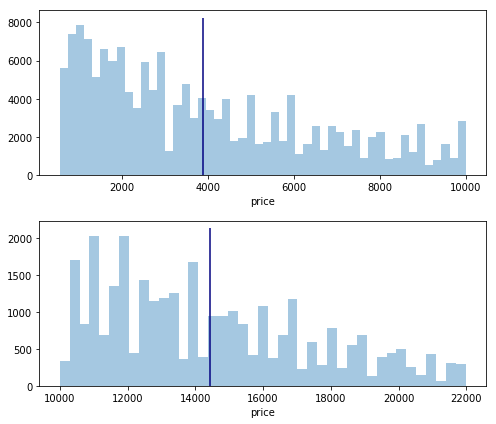

In [204]:
# plot the distribution of price of the 2 segments

fig, ax = plt.subplots(2, 1, figsize=(7,6))

sns.distplot(Y_eco, kde=False, ax=ax[0])
axmin, axmax = ax[0].get_ylim()
ax[0].vlines(Y_eco.mean(), axmin, axmax, colors='navy', linestyles='-', label='mean value')

sns.distplot(Y_lux, kde=False, ax=ax[1])
axmin, axmax = ax[1].get_ylim()
ax[1].vlines(Y_lux.mean(), axmin, axmax, colors='navy', linestyles='-', label='mean value')

plt.tight_layout()
plt.tight_layout()
plt.show()

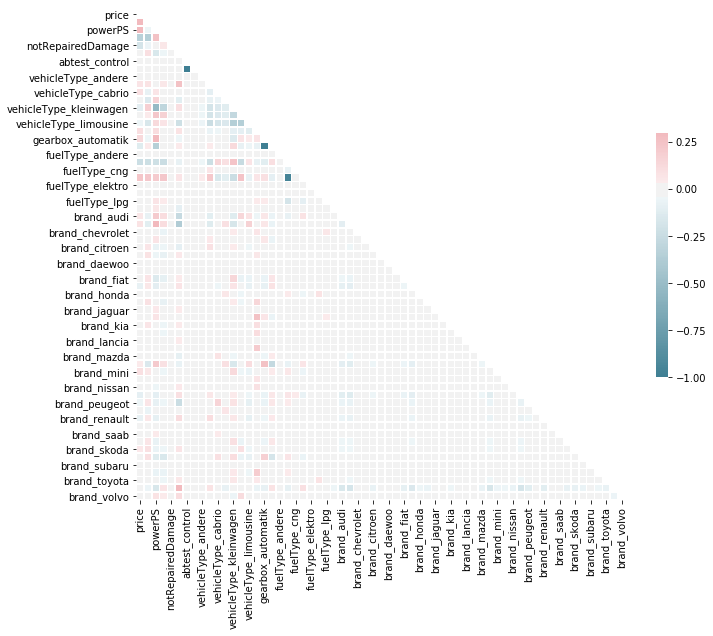

In [205]:
corr=df_eco.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Seg 1 - Eco class using Random Forest
results are less good 

In [ ]:
df_eco = df_eco.iloc[:,1:]
df_eco= np.matrix(df_eco)

In [209]:
#Define initial model without price

x_train_eco, x_test_eco, y_train_eco, y_test_eco = train_test_split (df_eco, Y_eco, test_size = 0.2, random_state = 2)

clf_original = linear_model.LinearRegression()
clf_original.fit(x_train_eco, y_train_eco)
r_squared=clf_original.score(x_test_eco, y_test_eco)
print r_squared
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test_eco)-1)/(len(y_test_eco)-x_test_eco.shape[1]-1)
print adjusted_r_squared

y_eco_pred = clf_original.predict(x_test_eco)
a =sk.mean_squared_error(y_test_eco, y_eco_pred)
RSE_eco = a**(1.0/2.0)
RSE_eco

0.630247731427
0.629529068125


1577.4317267480124

# Seg 2 - Lux class 
results are less good


In [18]:
df_lux = df_lux.iloc[:,1:]
df_lux= np.matrix(df_lux)

In [19]:
x_train_lux, x_test_lux, y_train_lux, y_test_lux = train_test_split (df_lux, Y_lux, test_size = 0.2, random_state = 2)

clf_original = linear_model.LinearRegression()
clf_original.fit(x_train_lux, y_train_lux)
r_squared=clf_original.score(x_test_lux, y_test_lux)
print r_squared
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test_lux)-1)/(len(y_test_lux)-x_test_lux.shape[1]-1)
print adjusted_r_squared

y_lux_pred = clf_original.predict(x_test_lux)
a =sk.mean_squared_error(y_test_lux, y_lux_pred)
RSE_lux = a**(1.0/2.0)
RSE_lux

0.327351386884
0.320477443582


2532.8937916967093